In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import cv2
#import json
#import xmltodict
#import xml.etree.ElementTree as ET
import pandas as pd
import re

In [2]:
import importlib
import utils
import shutil
import random
random.seed = 42

In [4]:
importlib.reload(utils)
from utils import get_boxes_texts, get_boxes_classes_xml, plot_all_boxes, get_boxes_classes_txt

In [5]:
val_dir = 'GBC_CV_attitude_test_2023_10/test_task/valid'
os.mkdir(val_dir)

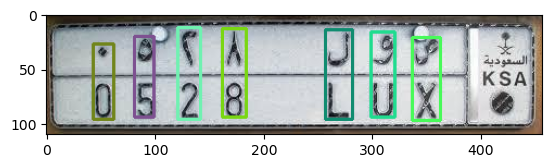

In [6]:
train_dir = 'GBC_CV_attitude_test_2023_10/test_task/train'
test_dir = 'GBC_CV_attitude_test_2023_10/test_task/test'

directories = {'train':  train_dir,
               'val': val_dir,
              'test': test_dir}

ann_file = 'ckictsenl0000246a2itn28ts.txt'
pic = cv2.imread(os.path.join(train_dir, ann_file.replace('.txt', '.jpeg')))
with open(os.path.join(train_dir, ann_file), 'r') as f:
    ann_data = f.readlines()
boxes, classes = get_boxes_classes_txt(ann_data)
pic_vis = plot_all_boxes(pic, boxes, classes)
plt.imshow(pic_vis)

In [7]:
train_anns = sorted(glob.glob( os.path.join(train_dir, '*.txt') ))
test_anns = glob.glob( os.path.join(test_dir, '*.txt') )
print(len(test_anns),len(train_anns), len(test_anns)/len(train_anns))

30 563 0.05328596802841918


In [8]:
train_pics = glob.glob( os.path.join(train_dir, '*.png') )
train_pics.extend(glob.glob( os.path.join(train_dir, '*.jpeg') ))
train_pics = sorted(train_pics)
len(train_pics)

563

In [11]:
valid_ratio = 0.1
int(1/valid_ratio)
inds = random.sample(list(np.arange(len(train_pics))), int(len(train_pics)*valid_ratio))

for num, tr_ann in enumerate(train_anns):
    #if num%int(1/valid_ratio)==0:
    if num in inds:
        tr_pic = tr_ann.replace('.txt','.jpeg')
        tr_xml = tr_ann.replace('.txt','.xml')
        shutil.move(tr_ann, val_dir)
        shutil.move(train_pics[num], val_dir)
        shutil.move(tr_xml, val_dir)

In [12]:
train_anns = glob.glob( os.path.join(train_dir, '*.txt'))
val_anns = glob.glob( os.path.join(val_dir, '*.txt'))
test_anns = glob.glob( os.path.join(test_dir, '*.txt'))
print(len(train_anns), len(val_anns), len(test_anns))

507 56 30


In [13]:
DF = pd.DataFrame(columns = ['DS_part', 'ann_file', 'class', 'x1', 'y1', 'x2', 'y2'])
row_n=0
for DS_part in directories:
    anns = glob.glob(os.path.join(directories[DS_part], '*.txt') )
    for ann_file in anns:
        with open( ann_file, 'r') as f:
            ann_data = f.readlines()
        boxes, classes = get_boxes_classes_txt(ann_data)
        for box, cl in zip(boxes, classes):
            x1, y1, x2, y2 = box
            DF.loc[row_n]=[DS_part, ann_file, int(cl), x1, y1, x2, y2]
            row_n+=1
        #print(ann_data, )

In [14]:
print(row_n, DF.shape) 
DF['x_c']= (DF['x1']+DF['x2'])/2
DF['y_c']= (DF['y1']+DF['y2'])/2
DF['w']= (DF['x2']-DF['x1'])
DF['h']= (DF['y2']-DF['y1'])
DF

3827 (3827, 7)


,DS_part,ann_file,class,x1,y1,x2,y2,x_c,y_c,w,h
0,train,GBC_CV_attitude_test_2023_10/test_task/train\c...,0,0.094092,0.254545,0.135667,0.872727,0.114880,0.563636,0.041575,0.618182
1,train,GBC_CV_attitude_test_2023_10/test_task/train\c...,5,0.177243,0.190909,0.218818,0.863636,0.198031,0.527273,0.041575,0.672727
2,train,GBC_CV_attitude_test_2023_10/test_task/train\c...,2,0.264770,0.118182,0.312910,0.872727,0.288840,0.495455,0.048140,0.754545
3,train,GBC_CV_attitude_test_2023_10/test_task/train\c...,8,0.354486,0.118182,0.402626,0.863636,0.378556,0.490909,0.048140,0.745455
4,train,GBC_CV_attitude_test_2023_10/test_task/train\c...,18,0.562363,0.136364,0.617068,0.872727,0.589716,0.504545,0.054705,0.736364
...,...,...,...,...,...,...,...,...,...,...,...
3822,test,GBC_CV_attitude_test_2023_10/test_task/test\ck...,10,0.738095,0.245902,0.821429,0.901639,0.779762,0.573770,0.083333,0.655738
3823,test,GBC_CV_attitude_test_2023_10/test_task/test\ck...,8,0.114035,0.020408,0.201754,0.938776,0.157895,0.479592,0.087719,0.918367
3824,test,GBC_CV_attitude_test_2023_10/test_task/test\ck...,8,0.210526,0.020408,0.298246,0.938776,0.254386,0.479592,0.087719,0.918367
3825,test,GBC_CV_attitude_test_2023_10/test_task/test\ck...,8,0.307018,0.061224,0.394737,0.959184,0.350877,0.510204,0.087719,0.897959


## classes_distribution

In [16]:
tr_freq = DF[DF['DS_part']=='train'].groupby(by = 'class')['DS_part'].count().reset_index()
val_freq = DF[DF['DS_part']=='val'].groupby(by = 'class')['DS_part'].count().reset_index()
te_freq = DF[DF['DS_part']=='test'].groupby(by = 'class')['DS_part'].count().reset_index()
#tr_freq = DF[DF['DS_part']=='train'].groupby(by = 'class').agg('DS_part', count).reset_index()
tr_freq.shape, val_freq.shape, te_freq.shape

((27, 2), (27, 2), (26, 2))

In [17]:
#te_freq.head()
[x for x in list(tr_freq['class']) if x not in list(te_freq['class'])] 

[22]

<Axes: xlabel='class'>

<Figure size 1200x600 with 0 Axes>

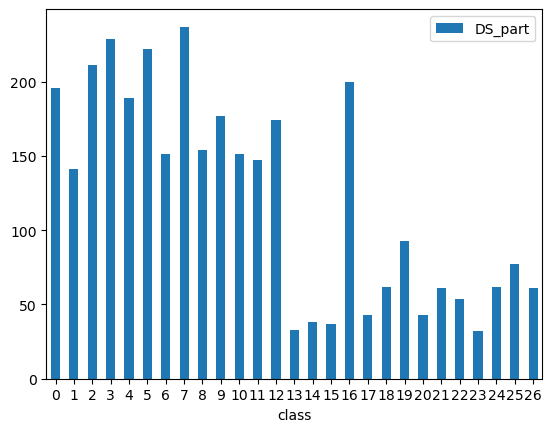

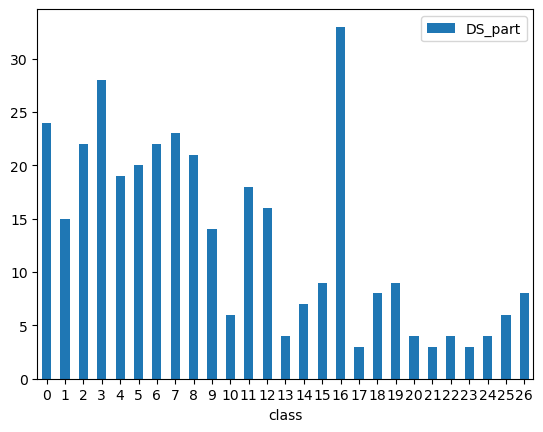

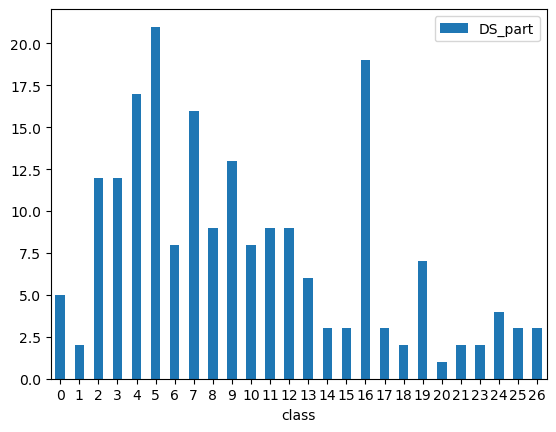

In [19]:
figure = plt.figure(figsize = (12,6))
tr_freq.plot.bar(x='class', y='DS_part', rot=0)
val_freq.plot.bar(x='class', y='DS_part', rot=0)
te_freq.plot.bar(x='class', y='DS_part', rot=0)

In [15]:
#there are some minor classes but the is inbalance is not critical

## number of symbols per picture

In [20]:
tr_symb_freq = DF[DF['DS_part']=='train'].groupby(by = 'ann_file')['DS_part'].count().reset_index()
val_symb_freq = DF[DF['DS_part']=='val'].groupby(by = 'ann_file')['DS_part'].count().reset_index()
te_symb_freq = DF[DF['DS_part']=='test'].groupby(by = 'ann_file')['DS_part'].count().reset_index()

In [21]:
tr_symb_freq

,ann_file,DS_part
0,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
1,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
2,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
3,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
4,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
...,...,...
502,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
503,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
504,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
505,GBC_CV_attitude_test_2023_10/test_task/train\c...,7


In [37]:
#np.array(tr_symb_freq['DS_part'].reset_index())
intersting_cases = te_symb_freq[te_symb_freq['DS_part']<3].reset_index()
intersting_cases.shape

(1, 3)

ckiea7roj007n246anpat44vr.txt


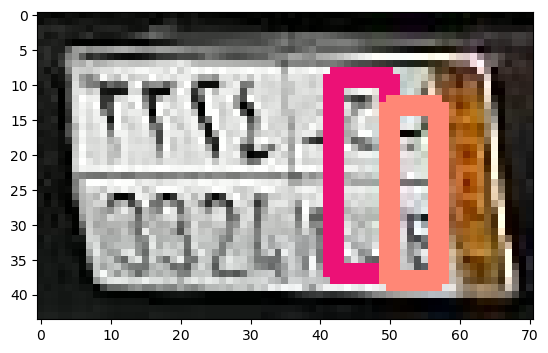

In [42]:
#ann_file = re.split('\|/', intersting_cases['ann_file'].head(1).item())[-1]#'ckictsenl0000246a2itn28ts.txt'
ann_file = intersting_cases['ann_file'].head(2).tail(1).item()[len(test_dir)+1:]
print(ann_file)

pic = cv2.imread(os.path.join(test_dir, ann_file.replace('.txt', '.jpeg')))
with open(os.path.join(test_dir, ann_file), 'r') as f:
    ann_data = f.readlines()
boxes, classes = get_boxes_classes_txt(ann_data)
pic_vis = plot_all_boxes(pic, boxes, classes)
plt.imshow(pic_vis)

with open(os.path.join(test_dir, ann_file), 'r') as f:
    ann_data = f.readlines()
boxes, classes = get_boxes_classes_txt(ann_data)
pic_vis = plot_all_boxes(pic, boxes, classes)
plt.imshow(pic_vis)

In [36]:
#missed objects. Annotation is not complete

In [24]:
#tr_symb_freq['DS_part'].value_counts()
#te_symb_freq['DS_part'].value_counts()

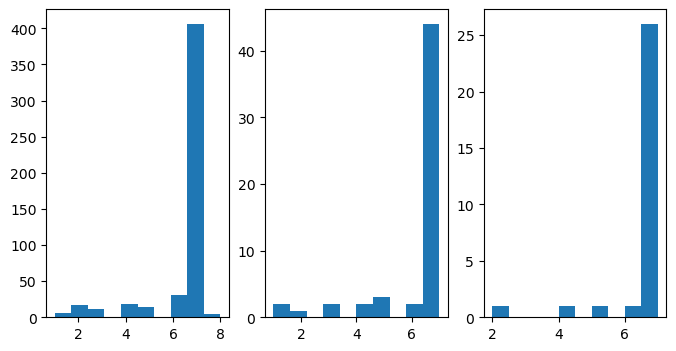

In [27]:
figure = plt.figure(figsize = (8,4))
plt.subplot(1, 3, 1)
tr_np = np.array(tr_symb_freq['DS_part'].reset_index())
ax1 = plt.hist(tr_np[:,1])

plt.subplot(1, 3, 2)
val_np = np.array(val_symb_freq['DS_part'].reset_index())
ax2 = plt.hist(val_np[:,1])


plt.subplot(1, 3, 3)
te_np = np.array(te_symb_freq['DS_part'].reset_index())
ax2 = plt.hist(te_np[:,1])

In [ ]:
#usually 7 symbols annotated, some symbols are not labelled

## resolution distribution

In [28]:
#train_pics = glob.glob( os.path.join(train_dir, '*.jpeg') )
#test_pics = glob.glob( os.path.join(test_dir, '*.jpeg') )

resolution_DS = pd.DataFrame(columns=['DS_part', 'pic', 'w', 'h'])
row_n = 0
for DS_part in directories:
    pics = glob.glob(os.path.join(directories[DS_part], '*.jpeg') )
    for pic in pics:
        img = cv2.imread(pic)
        h, w = img.shape[:2]
        resolution_DS.loc[row_n]=[DS_part, pic, w, h]
        row_n+=1

In [29]:
resolution_DS['aspect_ratio']=resolution_DS['w']/resolution_DS['h']

In [30]:
resolution_DS[['w','h', 'aspect_ratio']].describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,w,h,aspect_ratio
count,456.000000,456.000000,456.000000
mean,309.655702,159.151316,1.967609
std,271.400798,138.665053,0.607283
min,52.000000,26.000000,0.780000
25%,100.000000,55.000000,1.665043
50%,260.500000,130.000000,1.899768
75%,426.750000,208.250000,2.069525
90%,631.000000,324.500000,2.436426
95%,792.250000,436.750000,3.383365
99%,1139.700000,555.900000,4.359037


C:\Users\zamarseny\anaconda3_2023\envs\sec_page_jup\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


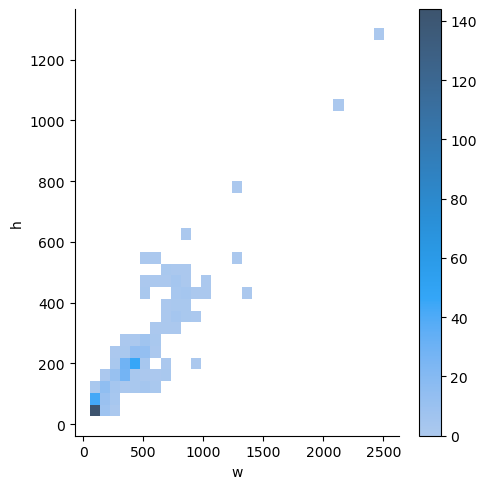

In [31]:
sns.displot(resolution_DS, x="w", y="h", \
            #binwidth=(2, .5), \
            cbar=True)


## width, height distribution 

In [32]:
DF[['w','h']].describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,w,h
count,3827.000000,3827.000000
mean,0.090632,0.642107
std,0.018581,0.106417
min,0.007246,0.015152
5%,0.056305,0.473853
10%,0.067308,0.507165
25%,0.080357,0.573770
50%,0.090186,0.640625
75%,0.102424,0.722222
90%,0.113636,0.779984


C:\Users\zamarseny\anaconda3_2023\envs\sec_page_jup\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


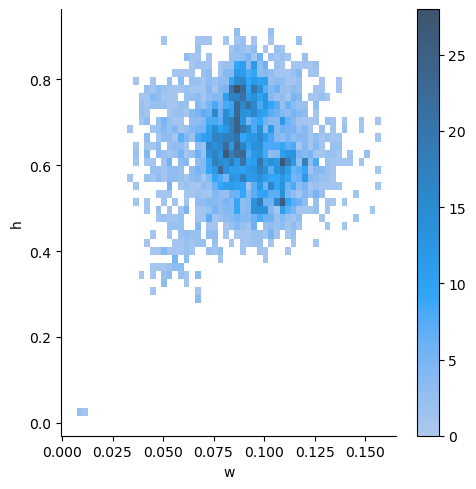

In [33]:
sns.displot(DF, x="w", y="h", \
            #binwidth=(2, .5), \
            cbar=True)

## boxes centers distribution

In [34]:
DF[['x_c','y_c']].describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,x_c,y_c
count,3827.000000,3827.000000
mean,0.446657,0.509614
std,0.226399,0.054321
min,0.018797,0.033333
5%,0.114105,0.420190
10%,0.138889,0.446154
25%,0.243123,0.481013
50%,0.424951,0.509868
75%,0.655086,0.538911
90%,0.762878,0.575881


C:\Users\zamarseny\anaconda3_2023\envs\sec_page_jup\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


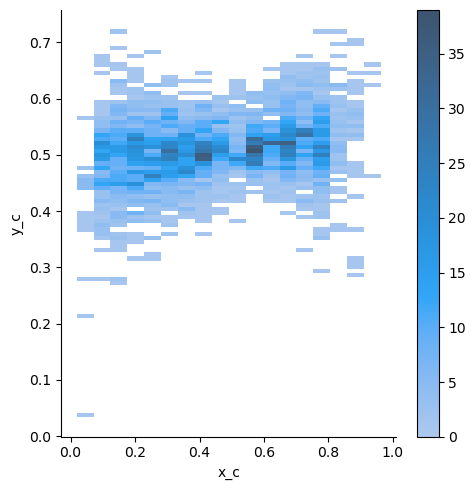

In [35]:
sns.displot(DF, x="x_c", y="y_c", \
            #binwidth=(2, .5), \
            cbar=True)